<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/BondYields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#API key from the US Fiscal data site 
# 0c62130f938c570fcdf5f817d965907c


In [2]:
!pip install pykrx

from pykrx import stock
from pykrx import bond

     |████████████████████████████████| 92 kB 158 kB/s 
     |████████████████████████████████| 51 kB 385 kB/s 
     |████████████████████████████████| 251 kB 39.0 MB/s 


In [3]:
!pip install -U finance-dataReader
import FinanceDataReader as fdr

     |████████████████████████████████| 48 kB 3.9 MB/s 


In [188]:
from pandas.core.frame import DataFrame
from datetime import date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def bond_graph(df, ax1, bToday=False):
    df.rename({df.columns[0]:'Yield', df.columns[1]: 'Ratio'}, axis=1, inplace=True)
    df = df[:][:7]
    df.index = ['1yrBond', '2yrBond', '3yrBond', '5yrBond', '10yrBond', '20yrBond', '30yrBond']
    
    if(bToday==True):
      print('Last day drawing in bold')
      df['Yield'].plot(ax=ax1, marker='o', linewidth=4, color='red')
    else:
      df['Yield'].plot(ax=ax1, marker='o', linewidth=2)
    


def bond_yield_graphs(start_date, end_date):

  print('\n')
  print('Displaying the data from ', start_date, 'to ', end_date, '\n')
  
  fig, ax1 = plt.subplots(figsize=(20, 10))

  #Generating the dates in timeseries
  dates = (start_date + timedelta(idx + 1) for idx in range((end_date - start_date).days))
  
  for idx in dates:
    str_idx = idx.strftime('%Y%m%d')
    try:
      df = bond.get_otc_treasury_yields(str_idx)
    except:
      print("The data retrieval on " + str_idx + " is failed.")
      break
    bond_graph(df, ax1)
  #Today's curve
  #end_date = end_date.strftime('%Y%m%d')

  #print(end_date)

  try:
      df_today = bond.get_otc_treasury_yields(end_date.strftime('%Y%m%d'))
  except:
      print("Today data is failed.")
      return

  print(df_today.head(7))
 
  bond_graph(df_today, ax1, True)

  plt.ylabel('Yields')
  plt.title('s. Korean Bond Yields from ' + str(start_date) + ' to ' + str(end_date))
  #plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()



Displaying the data from  2022-03-01 to  2022-04-06 

           수익률     대비
채권종류                 
국고채 1년   1.923  0.071
국고채 2년   2.748  0.119
국고채 3년   2.941  0.062
국고채 5년   3.097  0.068
국고채 10년  3.129  0.049
국고채 20년  3.117  0.039
국고채 30년  3.049  0.014
Last day drawing in bold


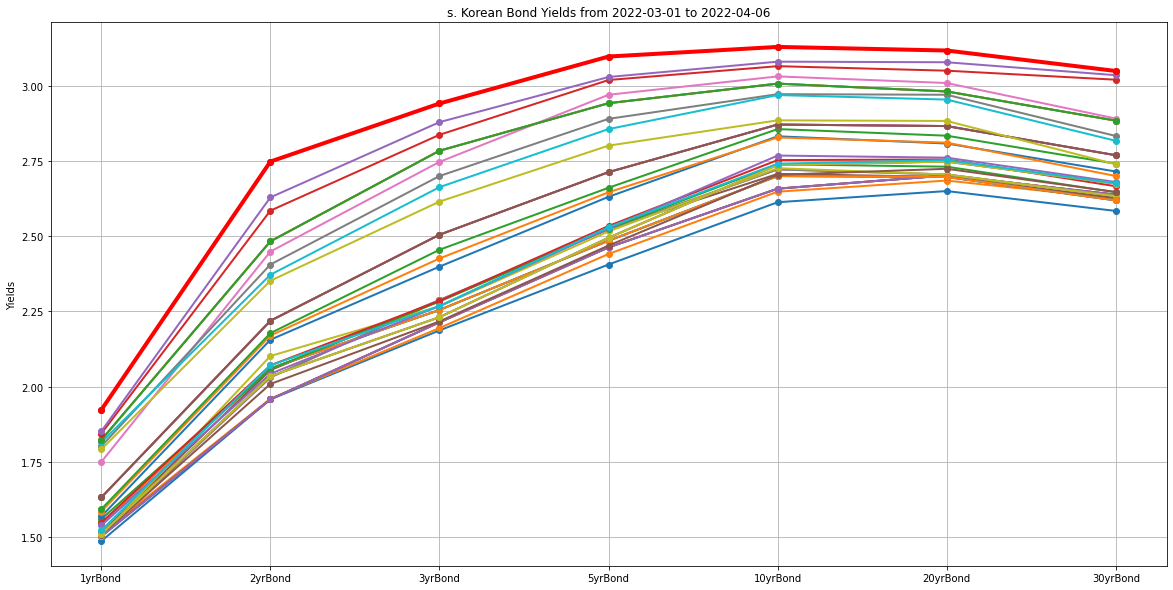

In [189]:
bond_yield_graphs(date(2022,3,1),  date(2022,4, 6))

## Plotting the bond yields by the types in timeseries
>* types: 1, 2, 3, 5, 10, 20 , and 30 years
>* issues: Before 2020, no data for the 2 year bond available

In [190]:
def timeseries_bond_yield_graphs(start_date, end_date):

  print('Plotting from', start_date, ' to ', end_date, '\n')

  start_date = start_date.strftime('%Y%m%d')
  end_date = end_date.strftime('%Y%m%d')

  print('\n')
  
  df = pd.DataFrame()

  yields = {'국고채1년':'1yrBond', '국고채2년':'2yrBond', '국고채3년':'3yrBond', '국고채5년':'5yrBond', '국고채10년':'10yrBond', '국고채20년':'20yrBond', '국고채30년':'30yrBond'}

  for idy, idx in yields.items():  
      try:
        df[idx] = bond.get_otc_treasury_yields(start_date, end_date, idy)['수익률']
      except:
        pass
  #print(df.info())
  #df.columns = ['1yrBond', '2yrBond', '3yrBond', '5yrBond', '10yrBond', '20yrBond', '30yrBond']
  df.index.names = ['Date']
  print(df.tail(1))

  df['10yr-1yr'] = (df['10yrBond'] - df['1yrBond']).rolling(5).mean()
  df['10yr-2yr'] = (df['10yrBond'] - df['2yrBond']).rolling(5).mean()
  df['10yr-3yr'] = (df['10yrBond'] - df['3yrBond']).rolling(5).mean()

  #Plotting
  fig, ax1 = plt.subplots(figsize=(16, 10))
  
  #df.plot(ax=ax1, linewidth=2)
  df['10yr-1yr'].plot(ax=ax1, linewidth=2)
  df['10yr-2yr'].plot(ax=ax1, linewidth=2)
  df['10yr-3yr'].plot(ax=ax1, linewidth=2)


  plt.xticks(rotation=45)
  plt.ylabel('Yields')
  plt.title('s. Korean Bond Yield Difference Graphs')
  plt.legend()
  plt.grid(True)
  plt.show()  # show the plot
  plt.close()  # close the plot space

Plotting from 2019-01-01  to  2022-04-06 



            1yrBond  2yrBond  3yrBond  5yrBond  10yrBond  20yrBond  30yrBond
Date                                                                        
2022-04-06    1.923    2.748    2.941    3.097     3.129     3.117     3.049


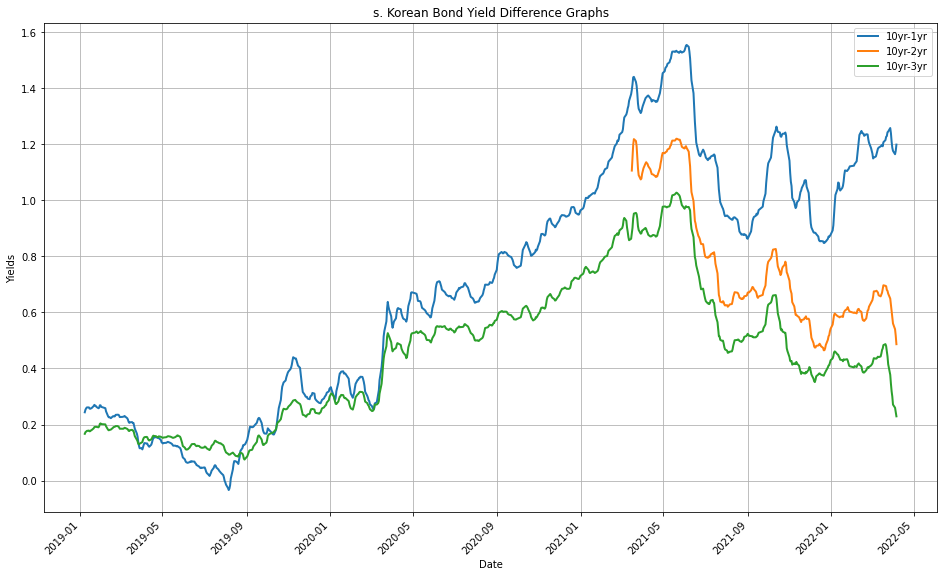

In [192]:
timeseries_bond_yield_graphs(date(2019, 1,1), date(2022, 4, 6))

In [196]:
def us_timeseries_bond_yield_graphs(start_date, end_date):
  print('Plotting from', start_date, ' to ', end_date)

  #S&P 500 Close
  df = fdr.DataReader('US500', start_date, end_date)
  #df.info()

  df = df.pivot_table(index='Date', values=['Close'])
  
  #Bond Yields
  three_m_df = fdr.DataReader('US3MT=X', start_date, end_date)
  one_y_df = fdr.DataReader('US1YT=X', start_date, end_date)
  two_y_df = fdr.DataReader('US2YT=X', start_date, end_date)
  five_y_df = fdr.DataReader('US5YT=X', start_date, end_date).rolling(5).mean()
  ten_y_df = fdr.DataReader('US10YT=X', start_date, end_date)
  twenty_df = fdr.DataReader('US20YT=X', start_date, end_date)
  thirty_df = fdr.DataReader('US30YT=X', start_date, end_date)

  df['10yr-3m'] = (ten_y_df['Close'] - three_m_df['Close'])#.rolling(5).mean()
  
  df['10yr-1yr'] = (ten_y_df['Close']  - one_y_df['Close'])#.rolling(5).mean()

  df['10yr-2yr'] = (ten_y_df['Close']  - two_y_df['Close'])#.rolling(5).mean()

  #Plotting
  plt.clf()
  fig, ax1 = plt.subplots(figsize=(16, 10))
  df.rename(columns= {'Close': 'S&P 500'}, inplace=True)
  df.plot(ax=ax1, linewidth=2, marker = 'o', secondary_y=['10yr-3m', '10yr-1yr', '10yr-2yr'])
  plt.ylabel('Yields')
  plt.title('SP&500 & the difference in short term and long term yields')
  #plt.legend(loc='lower left')
  plt.grid(True)
  plt.show()
  plt.close()


  fig, ax2 = plt.subplots(figsize=(16, 10))
  df1 = DataFrame()
  df1['3m'] = three_m_df['Close']
  df1['1yr'] = one_y_df['Close']
  df1['2yr'] = two_y_df['Close']
  df1['5yr'] = five_y_df['Close']
  df1['10yr'] = ten_y_df['Close']
  df1['20yr'] = twenty_df['Close']
  df1['30yr'] = thirty_df['Close']

  df1 = df1.T
  #print(df1.head())
  
  df1.plot(ax=ax2, linewidth=2,legend=None, alpha=0.5)

  df1.iloc[:,-1].plot(ax=ax2, linewidth=4,legend=None, color='red', marker='o')

  print(df1.columns[-32], df1.iloc[:,-3])
  print(df1.columns[-2], df1.iloc[:,-2])
  print(df1.columns[-1], df1.iloc[:,-1])

  plt.ylabel('Yields')
  plt.title('US Bond Yields from ' + str(start_date) + ' to ' + str(end_date))
  plt.grid(True)
  plt.show()
  plt.close()



Plotting from 2022-01-01  to  2022-04-06


<Figure size 432x288 with 0 Axes>

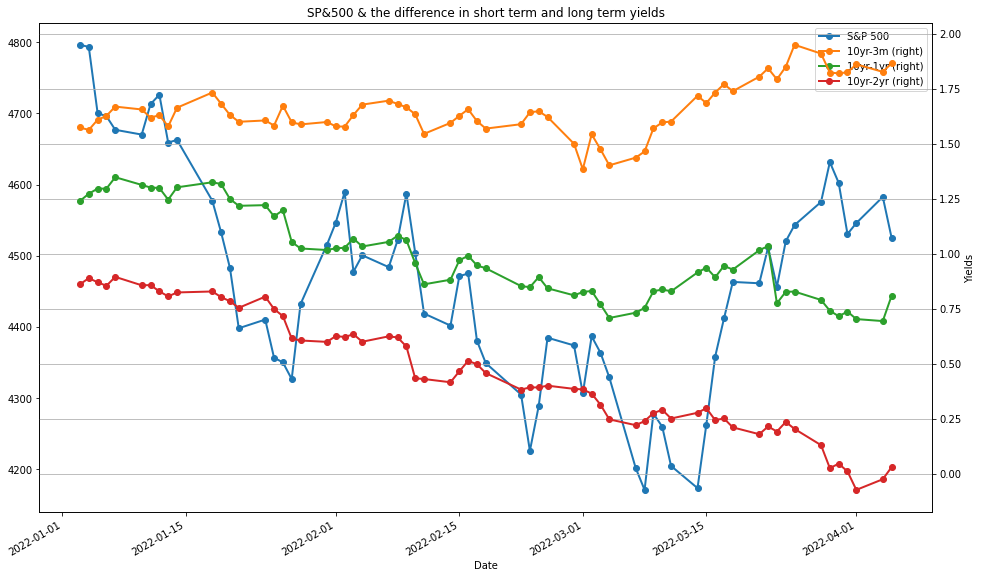

2022-03-01 00:00:00 3m      0.5660
1yr     1.6990
2yr     2.4181
5yr     2.5219
10yr    2.3930
20yr    2.6203
30yr    2.4560
Name: 2022-04-04 00:00:00, dtype: float64
2022-04-05 00:00:00 3m      0.68800
1yr     1.74500
2yr     2.52410
5yr     2.57438
10yr    2.55400
20yr    2.75580
30yr    2.58200
Name: 2022-04-05 00:00:00, dtype: float64
2022-04-06 00:00:00 3m      0.68550
1yr     1.77390
2yr     2.52860
5yr     2.63104
10yr    2.62800
20yr    2.83840
30yr    2.66300
Name: 2022-04-06 00:00:00, dtype: float64


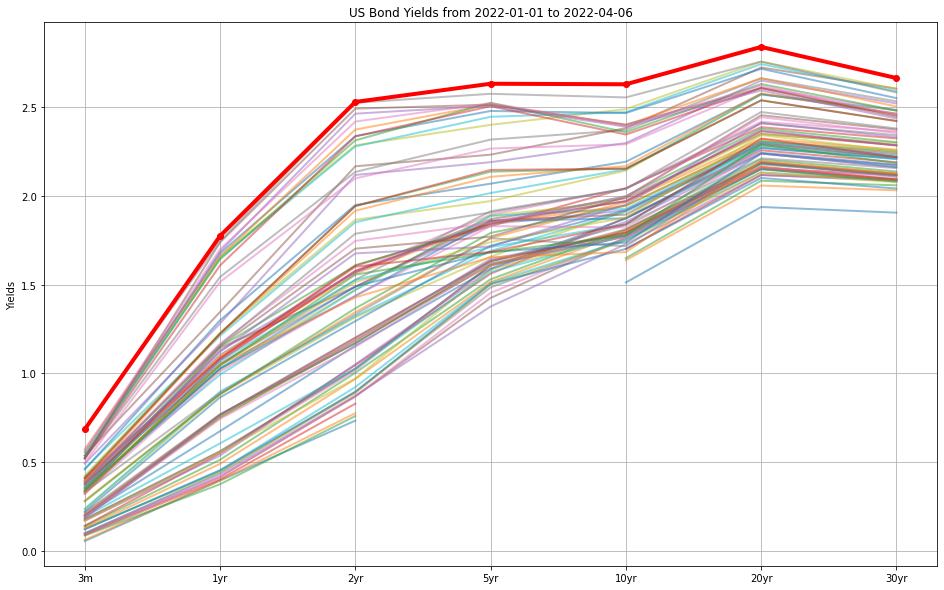

In [197]:
us_timeseries_bond_yield_graphs('2022-01-01',  date.today())

##Errors in fdr.DataReader('KR1YT=RR)
>* It does not return the correct bond yield.
>* For the time being, the DataReader should NOT be used for the bond data retrieval. Useless.


In [49]:
#s. Korean bond market
# Syntax 'KRNYT=RR' N= 1,2,3,4,5,10,20,30,50

def k_bond_yield_graphs(start_date, end_date):
  print('Plotting from', start_date, ' to ', end_date)

  #S&P 500 Close
  df = fdr.DataReader('KS11', start_date, end_date)
  #df.info()

  df = df.pivot_table(index='Date', values=['Close'])
  
  #Bond Yields
  short_df = fdr.DataReader('KR1YT=RR', start_date, end_date)
  #three_m_df.info()
  ten_y_df = fdr.DataReader('KR10YT=RR', start_date, end_date)
  #ten_y_df.info()
  ten2_y_df = fdr.DataReader('KR20YT=RR', start_date, end_date)
  ten3_y_df = fdr.DataReader('KR30YT=RR', start_date, end_date)

  try:
    df['dy0'] = (ten_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  try:
    df['dy1'] = (ten2_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  try:
    df['dy2'] = (ten3_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  
  #df['dy1_df'] = ten_y_df - one_y_df

  df.rename(columns= {'Close': 'KOSPI', 'dy0':'10 yr - 1 yr yields'}, inplace=True)
  #df.info()

  #Plotting
  fig, ax1 = plt.subplots(figsize=(16, 10))
  
  df.plot(ax=ax1, linewidth=2, secondary_y=['10 yr - 1 yr yields', 'dy1', 'dy2'])



  plt.ylabel('Yields')
  #plt.title('SP&500 & 50 & 200 days ave. along with the difference in short term and long term yields')
  plt.title('KOSPI & the difference in short term and long term yields')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()

  #plt.figure.figsize = (25,5)
  #three_m_df.plot(label='Three month Bond')
  #one_y_df.plot(label='One year Bond')
  #five_y_df.plot(label='Five year Bond')
  #ten_y_df.plot(label='Ten year Bond')
  #plt.legend()
  #plt.grid(True)
  #plt.show()
  #plt.close()


  #df.to_csv('out.csv')

#bond_yield_graphs('2020-01-01',  date.today())

In [25]:
def daily_bond_yield_graphs(start_date, end_date):
  print('\n')
  print('Plotting from', start_date, ' to ', end_date, '\n')

  #Bond Yields 1,2,3,4,5,10,20,30,50

  #plotting
  df = pd.DataFrame()

  try:
    df['1 yr'] = fdr.DataReader('KR1YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['2 yr'] = fdr.DataReader('KR2YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['3 yr'] = fdr.DataReader('KR3YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['4 yr']  = fdr.DataReader('KR4YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['5 yr'] = fdr.DataReader('KR5YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['10 yr']  = fdr.DataReader('KR10YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['20 yr']  = fdr.DataReader('KR20YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['30 yr'] = fdr.DataReader('KR30YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['50 yr']  = fdr.DataReader('KR50YT=RR', start_date, end_date)['Close']
  except:
    pass

  fig, ax1 = plt.subplots(figsize=(20, 10))
  df.plot(ax=ax1)

  plt.ylabel('Yields')
  plt.title('yields')
  #plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()